In [2]:
# Libraries
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate, special

## 0. Change of coordinates:
$x_1 = x\cos\frac{\phi}{2} - s\sin\frac{\phi}{2}    s_1 = s\cos\frac{\phi}{2} + x\sin\frac{\phi}{2}$\
$x_2 = x\cos\frac{\phi}{2} + s\sin\frac{\phi}{2}    s_2 = s\cos\frac{\phi}{2} - x\sin\frac{\phi}{2}$

$L_0 = \frac{fN_1N_2}{4\pi\sigma_{0x}\sigma_{0y}}$\
where $\sigma_{0i} = \sqrt{\epsilon_i\beta}$\
and $\beta(s) = \beta^*(1 + (\frac{s}{\beta^*})^2)$

Relativistic Factor:\
$K = 2\cos^2\frac{\phi}{2}$

## Calcuation:
$L = 2\cos^2\frac{\phi}{2}N_1N_2f
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\rho_1(x_1, y_1, s_1, s_{01})\rho_2(x_2, y_2, s_2, s_{02})$ dxdydsds_0

$ = \cos^2\frac{\phi}{2}N_1N_2f
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{4\pi^3\beta^2\epsilon_x\epsilon_y\sigma_z^2}
\exp(-\frac{x_1^2}{2\sigma_x^2})\exp(-\frac{y_1^2}{2\sigma_y^2})\exp(-\frac{(s_1 - s_0)^2}{2\sigma_z^2}) 
\exp(-\frac{x_2^2}{2\sigma_x^2})\exp(-\frac{y_2^2}{2\sigma_y^2})\exp(-\frac{(s_2 + s_0)^2}{2\sigma_z^2})$
dxdydsds_0

Integrate wrt y and s0:

$ = \frac{\cos^2\frac{\phi}{2}N_1N_2f}{4\pi^{5/2}\epsilon_x\sqrt{\epsilon_y}\sigma_z^2}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{\beta^2}
\exp(-\frac{x_1^2 + x_2^2}{2\sigma_x^2})\exp(-\frac{(s_1^2 + s_2^2 + 2s_0^2 + 2s_0(s_2 - s_1)}{2\sigma_z^2})$ 
dxdsds_0

$ = \frac{\cos^2\frac{\phi}{2}N_1N_2f}{4\pi^2\epsilon_x\sqrt{\epsilon_y}\sigma_z}
\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}
\frac{1}{\beta^2}
\exp(-\frac{x_1^2 + x_2^2}{2\sigma_x^2})\exp(-\frac{(s_1^2 + s_2^2 + 2(s_2 - s_1)^2}{2\sigma_z^2}) $
dxds

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z}
$exp$(-(\frac{ s^2\sin^2(\frac{\phi}{2}) + x^2\cos^2(\frac{\phi}{2}) }{\beta\epsilon_x})) 
$exp$(-(\frac{ s^2\cos^2(\frac{\phi}{2}) + x^2\sin^2(\frac{\phi}{2}) }{\sigma_z^2}))$ dxds

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^2\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z}
$exp$(-x^2(\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2} ))
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ dxds

Integrate wrt x:

$= \cos^2(\frac{\phi}{2})fN_1N_2\int_{-\infty}^{\infty}
\frac{1}{4\pi^{1.5}\epsilon_x\sqrt{\epsilon_y}\beta^{1.5}\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

$= L_0\int_{-\infty}^{\infty}
\frac{\cos^2(\frac{\phi}{2})}{\sqrt{\pi}\sigma_{x0}(1 + (\frac{s}{\beta^*})^2)^{1.5}\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds


## 1. Integral:

In [95]:
#Integrand to evaluate
def Integrand(s, beta_star, ex, sz, phi):
    beta = beta_star*(1 + (s/beta_star)**2)
    sx0 = np.sqrt(ex*beta_star)
    denom = (beta/beta_star)**(1.5)*sz*(np.cos(phi/2)**2/(beta*ex) + np.sin(phi/2)**2/sz**2)**.5*np.pi**.5*sx0
    num = np.exp(-s**2*(np.sin(phi/2)**2/(beta*ex) + np.cos(phi/2)**2/sz**2))
    return num/denom*np.cos(phi/2)**2

In [96]:
# Initial conditions
f = 1
N1 = 1
N2 = 1
beta_star = 1
ex = 1
ey = 1
sx = np.sqrt(ex*beta_star)
sy = np.sqrt(ey*beta_star)
sz = 1
phi = 0#np.pi/180 #1 degree

# Bounds
a, b = -np.inf, np.inf

In [97]:
# Using Scipy
Luminosity_int = lambda beta_star, ex, sz, phi, a, b: integrate.quad(Integrand, a, b,
                                                               args = (beta_star, ex, sz, phi))[0]
res = Luminosity_int(beta_star, ex, sz, phi, a, b)
L0 = f*N1*N2/(4*np.pi*sx*sy)
print("Normalized Luminosity for beta*/sigma_s = %f:"%(beta_star/sz), res)

Normalized Luminosity for beta*/sigma_s = 1.000000: 0.7578721561413122


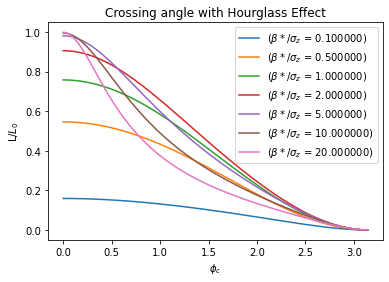

In [6]:
N = 100
Phi = np.linspace(0, np.pi, N + 1)
Luminosities = np.zeros(N + 1)
beta_star = np.array([.1, .5, 1, 2, 5, 10, 20])
for b_star in beta_star:
    for i, p in enumerate(Phi):
        Luminosities[i] = Luminosity_int(b_star, ex, 1, p, a, b)
    plt.plot(Phi, Luminosities, label = r"($\beta*/\sigma_z$ = %f)"%b_star)
plt.title(r"Crossing angle with Hourglass Effect")
plt.legend()
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$\phi_c$")
plt.show()

- As $\phi$ increases, the Luminosity will always go down.
- As $\beta^*/\sigma_z$ increases (hourglass factor), the maximum of the curve increases, but the angle freedom (how far theta can be before L($\phi$) - L(0) > $\epsilon$, where $\epsilon$ is a small value) decreases.
- There is a balance at around $2 < \beta^*/\sigma_z < 6$ where there is a large luminosity with a large angle freedom

## 2. Luminosity at a specific region with specific parameters

In [91]:
# Initial conditions accurate to an experiment
beta_star_param = .2 #m
sz_param = .2
sx_param = 100E-6 #microns
ex_param = sx_param**2/beta_star_param #does not change Luminosity much
phi_param = .002 #2 mrad

# Bounds
a_param, b_param = -.1, .1 #10 cm
L_1 = Luminosity_int(beta_star_param, ex_param, sz_param, phi_param, a_param, b_param)

#infinity bounds
L_0 = Luminosity_int(beta_star_param, ex_param, sz_param, phi_param, a, b)

print("Normalized Luminosity with given parameters (want to maximize):", L_1)
print("Normalized Luminosity at infinite bound:", L_0)
print("Difference (want to minimize):", L_0 - L_1)

Normalized Luminosity with given parameters (want to maximize): 0.38479481679140337
Normalized Luminosity at infinite bound: 0.45133789493312476
Difference (want to minimize): 0.06654307814172139


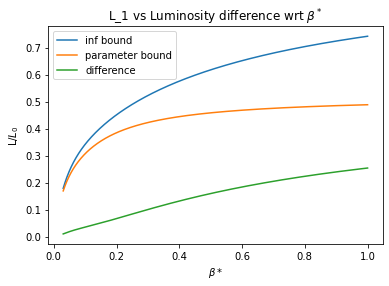

In [93]:
# Plot both with respect to beta_star
# Need to include L0(beta*)
N = 1000
Beta_star = np.linspace(.03, 1, N + 1)
L_1_plot = np.zeros(N + 1)
L_0_plot = np.zeros(N + 1)
for i, bs in enumerate(Beta_star):
    #integral from a_param to b_param
    L_1_plot[i] = Luminosity_int(bs, ex_param, sz_param, phi_param, a_param, b_param)
    #integral from -inf to inf
    L_0_plot[i] = Luminosity_int(bs, ex_param, sz_param, phi_param, a, b)
    
plt.plot(Beta_star, L_0_plot, label = "inf bound")
plt.plot(Beta_star, L_1_plot, label = "parameter bound")
plt.plot(Beta_star, L_0_plot - L_1_plot, label = "difference")

curve_beta_star = L_1_plot - (L_0_plot - L_1_plot)#*.01 #maximize - minimize
#plt.plot(Beta_star, curve_beta_star, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\beta^*$")
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$\beta*$")
plt.legend()
plt.show()

In [44]:
beta_star_max = Beta_star[np.argmax(curve_beta_star)]
print("Beta star for max Luminosity:", beta_star_max)

Beta star for max Luminosity: 0.26571


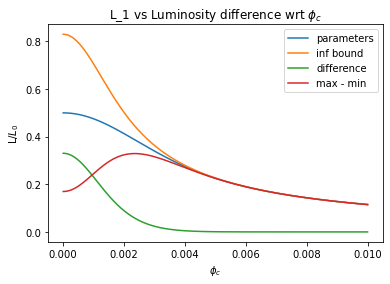

In [35]:
# Plot with respect to Phi
Phi = np.linspace(0, .01, N + 1)
L_1_plot2 = np.zeros(N + 1)
L_0_plot2 = np.zeros(N + 1)
for i, p in enumerate(Phi):
    L_1_plot2[i] = Luminosity_int(beta_star_max, ex_param, sz_param, p, a_param, b_param)
    L_0_plot2[i] = Luminosity_int(beta_star_max, ex_param, sz_param, p, a, b)
plt.plot(Phi, L_1_plot2, label = "parameters")
plt.plot(Phi, L_0_plot2, label = "inf bound")
plt.plot(Phi, L_0_plot2 - L_1_plot2, label = "difference")

curve_phi = L_1_plot2 - (L_0_plot2 - L_1_plot2)
plt.plot(Phi, curve_phi, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\phi_c$")
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$\phi_c$")
plt.legend()
plt.show()

In [43]:
phi_max = Phi[np.argmax(curve_phi)]
print("Phi for max Luminosity:", phi_max)

Phi for max Luminosity: 0.00235


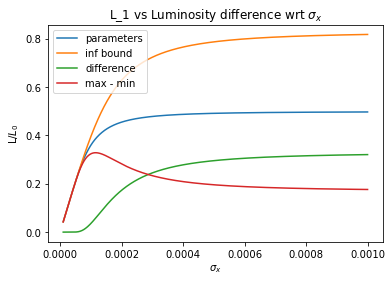

In [52]:
# Plot with respect to sigma_x
# Need to include L0
Sigma_x = np.linspace(1E-5, 1E-3, N + 1)#microns
Eps_x = Sigma_x**2/beta_star_max
L_1_plot3 = np.zeros(N + 1)
L_0_plot3 = np.zeros(N + 1)
for i, e_x in enumerate(Eps_x):
    L_1_plot3[i] = Luminosity_int(beta_star_max, e_x, sz_param, phi_max, a_param, b_param)
    L_0_plot3[i] = Luminosity_int(beta_star_max, e_x, sz_param, phi_max, a, b)
plt.plot(Sigma_x, L_1_plot3, label = "parameters")
plt.plot(Sigma_x, L_0_plot3, label = "inf bound")
plt.plot(Sigma_x, L_0_plot3 - L_1_plot3, label = "difference")

curve_sigma_x = L_1_plot3 - (L_0_plot3 - L_1_plot3)
plt.plot(Sigma_x, curve_sigma_x, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\sigma_x$")
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$\sigma_x$")
plt.legend()
plt.show()

In [46]:
sigma_x_max = Sigma_x[np.argmax(curve_sigma_x)]
eps_x_max = sigma_x_max**2/beta_star_max
print("sigma_x for max Luminosity:", sigma_x_max)

Phi for max Luminosity: 0.00011494000000000001


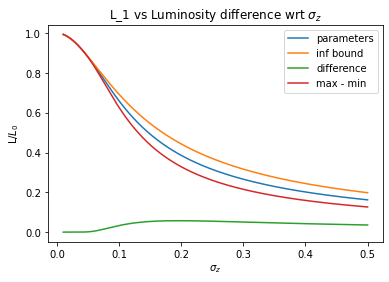

In [49]:
# Plot with respect to sigma_z
Sigma_z = np.linspace(.01, .5, N + 1)
L_1_plot4 = np.zeros(N + 1)
L_0_plot4 = np.zeros(N + 1)
for i, s_z in enumerate(Sigma_z):
    L_1_plot4[i] = Luminosity_int(beta_star_max, eps_x_max, s_z, phi_max, a_param, b_param)
    L_0_plot4[i] = Luminosity_int(beta_star_max, eps_x_max, s_z, phi_max, a, b)
plt.plot(Sigma_z, L_1_plot4, label = "parameters")
plt.plot(Sigma_z, L_0_plot4, label = "inf bound")
plt.plot(Sigma_z, L_0_plot4 - L_1_plot4, label = "difference")

curve_sigma_z = L_1_plot4 - (L_0_plot4 - L_1_plot4)
plt.plot(Sigma_z, curve_sigma_z, label = "max - min")
plt.title(r"L_1 vs Luminosity difference wrt $\sigma_z$")
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$\sigma_z$")
plt.legend()
plt.show()

## 3. s-offset ($\vec{s}^*$)

Integrate integrand but now $\vec{s}^* \neq$ 0 at IP:\
$\beta(s) = \beta^*(1 + (\frac{(s - s^*)}{\beta^*})^2)$

This also means that $\beta(s)$ will be different for x and y as well:\
$\beta_i(s) = \beta^*(1 + (\frac{(s - s_i^*)}{\beta^*})^2); i = x, y$

Combine with previous result:\
$L = L_0\int_{-\infty}^{\infty}
\frac{\cos^2(\frac{\phi}{2})}{\sqrt{\pi}\sigma_{x0}\frac{\beta_x(s)}{\beta^*}\sqrt{\frac{\beta_y(s)}{\beta^*}}\sigma_z
\sqrt{\frac{ \cos^2(\frac{\phi}{2}) }{\beta_x(s)\epsilon_x} + \frac{\sin^2(\frac{\phi}{2})}{\sigma_z^2}} }
$exp$(-s^2(\frac{ \sin^2(\frac{\phi}{2}) }{\beta_x(s)\epsilon_x} + \frac{\cos^2(\frac{\phi}{2})}{\sigma_z^2} ))$ ds

In [62]:
#Integrand with s*
def Integrand_s_star(s, s_star_x, s_star_y, beta_star, ex, sz, phi):
    beta_x = beta_star*(1 + ((s - s_star_x)/beta_star)**2)
    beta_y = beta_star*(1 + ((s - s_star_y)/beta_star)**2)
    sx0 = np.sqrt(ex*beta_star)
    denom = (np.pi**.5*sx0*(beta_x/beta_star)*(beta_y/beta_star)**.5*sz*
             (np.cos(phi/2)**2/(beta_x*ex) + np.sin(phi/2)**2/sz**2)**.5)
    num = np.exp(-s**2*(np.sin(phi/2)**2/(beta_x*ex) + np.cos(phi/2)**2/sz**2))
    return num/denom*np.cos(phi/2)**2

In [63]:
# Previous Initial conditions
f = 1
N1 = 1
N2 = 1
beta_star = 1
ex = 1
ey = 1
sx = np.sqrt(ex*beta_star)
sy = np.sqrt(ey*beta_star)
sz = 1
phi = 0#np.pi/180 #1 degree
s_star_x = 0
s_star_y = 0

# Bounds
a, b = -np.inf, np.inf

In [67]:
# Using Scipy
Luminosity_int_s_star = lambda s_star_x, s_star_y, beta_star, ex, sz, phi, a, b: integrate.quad(
                                Integrand_s_star, a, b, args = (s_star_x, s_star_y, beta_star, ex, sz, phi))[0]
res_s_star0 = Luminosity_int_s_star(s_star_x, s_star_y, beta_star, ex, sz, phi, a, b)

L0 = f*N1*N2/(4*np.pi*sx*sy)
print("Normalized Luminosity for (s_star_x, s_star_y) = (%f, %f):"%(s_star_x, s_star_y), res_s_star0)

Normalized Luminosity for (s_star_x, s_star_y) = (0.000000, 0.000000): 0.7578721561413122


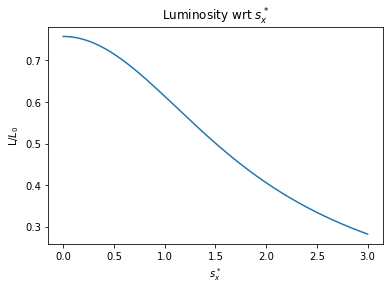

In [70]:
S_star_x = np.linspace(0, 3, N + 1)
Luminosities_s_star_x = np.zeros(N + 1)
for i, s in enumerate(S_star_x):
    Luminosities_s_star_x[i] = Luminosity_int_s_star(s, s_star_y, beta_star, ex, sz, phi, a, b)
plt.plot(S_star_x, Luminosities_s_star_x)
plt.title(r"Luminosity wrt $s_x^*$")
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$s_x^*$")
plt.show()

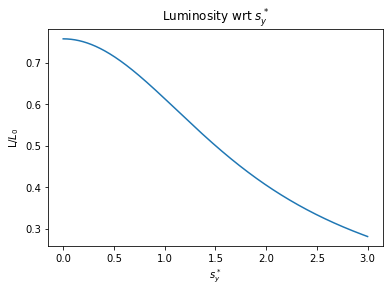

In [71]:
S_star_y = np.linspace(0, 3, N + 1)
Luminosities_s_star_y = np.zeros(N + 1)
for i, s in enumerate(S_star_y):
    Luminosities_s_star_y[i] = Luminosity_int_s_star(s_star_x, s, beta_star, ex, sz, phi, a, b)
plt.plot(S_star_y, Luminosities_s_star_y)
plt.title(r"Luminosity wrt $s_y^*$")
plt.ylabel(r"L/$L_0$")
plt.xlabel(r"$s_y^*$")
plt.show()